In [2]:
from importlib import reload
import legged
from legged import robotBulletEnv
urdfs_path = '/home/cslcollab-ghaffri/Sadaf/Software/twoBitToFasta/projs/1/Project/pybulletfiles/organizedfiles/urdf'
env = robotBulletEnv(gui=False, time_step = 1./240, controllable_joints=[0],
                     robot_urdf = urdfs_path +'/pendulum.urdf')
env.reset()
env.print_joints_info()

Joints Information Table: 
   Index            Name      Type  Damping  Friction  Lower Limit  \
0      0  b'base_to_leg'  Revolute      0.0       0.0          0.0   

   Upper Limit  Max Force  Max Velocity Link Name             Axis  
0         -1.0      200.0           5.0    b'leg'  (1.0, 0.0, 0.0)  
--------------------------------------------


Links Information Table: 
  Link name Link Index  Lateral friction  Rolling friction  Spinning friction  \
0    b'leg'          0               0.5               0.0                0.0   
1      Base         -1               0.5               0.0                0.0   

   Contact damping  Contact stiffness  Restitution  
0             -1.0               -1.0          0.0  
1             -1.0               -1.0          0.0  

Joints ['base_to_leg'] will be controlled during the simulation.


In [5]:
import pybullet as p
p.getDynamicsInfo(env.plane, linkIndex=-1, physicsClientId = env.physicsClientId)

(0.0,
 1.0,
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0, 1.0),
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0)

In [3]:
print(env.reset())
for i in range(100000):
    if i%500 == 0:
        print(i, end=' ', flush=True)
        env.render()
    env.step([1,2])

[0.00250036 0.03810689 0.         0.        ]
0 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 10500 11000 11500 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500 20000 20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000 30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 36000 36500 37000 37500 38000 38500 39000 39500 40000 40500 41000 41500 42000 42500 43000 43500 44000 44500 45000 45500 46000 46500 47000 47500 48000 48500 49000 49500 50000 50500 51000 51500 52000 52500 53000 53500 54000 54500 55000 55500 56000 56500 57000 57500 58000 58500 59000 59500 60000 60500 61000 61500 62000 62500 63000 63500 64000 64500 65000 65500 66000 66500 67000 67500 68000 68500 69000 69500 70000 70500 71000 71500 72000 72500 73000 73500 74000 74500 75000 75500 76000 76500 77000 77500 78000 78500 79000 79500 80000 80500 81000 

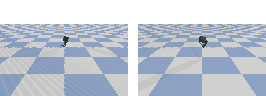

In [4]:
import IPython.display
import PIL.Image
disp_np_im = lambda np_im: IPython.display.display(PIL.Image.fromarray(np_im.astype(np.uint8)))
disp_np_im(env.render().astype(np.int32))

In [ ]:
done = False
while not done:
    try:
        env.compile_video(out_file='test.mp4', fps = 20)
        done = True
    except OSError:
        import time
        time.sleep(0.3)
        pass